In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../results/brisque_scores.csv')
df

,algorithm,original_filename,score
0,bbhe,MuzYhuKsV6.png,6.516089
1,bbhe,7OKvzizH.png,0.000000
2,bbhe,eD80tfb0.png,24.037924
3,bbhe,1UXZfhm4.png,4.364923
4,bbhe,VaD7nRZa.png,23.151558
...,...,...,...
791,clahe,76jFmOA9.png,11.859232
792,clahe,jb2OPpkq.png,30.489128
793,clahe,w76UyAAA.png,23.309658
794,clahe,imyyw77u.png,26.695061


In [10]:
# unique original filenames
fns = pd.unique(df.original_filename)
fns.size

199

In [12]:
for i, j in enumerate(range(2,5)):
    print(i, j)

0 2
1 3
2 4


In [37]:
df[2]

KeyError: 2

In [46]:
rows = df.query('original_filename=="MuzYhuKsV6.png"')
rows

,algorithm,original_filename,score
0,bbhe,MuzYhuKsV6.png,6.516089
228,splinet,MuzYhuKsV6.png,0.890449
454,no_processing,MuzYhuKsV6.png,5.533060
597,clahe,MuzYhuKsV6.png,15.793130


In [148]:
diff = pd.DataFrame(columns=["original_filename", "bbhe", "clahe", "splinet", "no_processing"])
# the algorithm columns are deltas compared to no_processing
for i, fn in enumerate(fns):
    rows = df.query('original_filename==@fn')
    np_score = rows[rows.algorithm == "no_processing"].score.iloc[0]
    result = {
        "original_filename": fn,
        "bbhe": rows.query('algorithm=="bbhe"').score.iloc[0] - np_score,
        "clahe": rows.query('algorithm=="clahe"').score.iloc[0] - np_score,
        "splinet": rows.query('algorithm=="splinet"').score.iloc[0] - np_score,
         "no_processing": np_score,
    }
    diff = diff.append(result, ignore_index=True)
diff

,original_filename,bbhe,clahe,splinet,no_processing
0,MuzYhuKsV6.png,0.983030,10.260070,-4.642611,5.533060
1,7OKvzizH.png,-8.826059,-6.290877,-8.826059,8.826059
2,eD80tfb0.png,6.734516,15.969915,1.853905,17.303408
3,1UXZfhm4.png,-18.782008,-23.146931,-13.262877,23.146931
4,VaD7nRZa.png,8.863526,13.351562,6.731551,14.288032
...,...,...,...,...,...
194,pqpowjWytV.png,-3.604475,8.670029,1.876734,9.648346
195,1432.png,0.000000,17.039295,6.722821,0.000000
196,j1xXEzjl.png,-1.137733,19.319182,-1.058340,3.754857
197,tOdxgRa3.png,-13.854807,-19.835863,-10.607350,19.835863


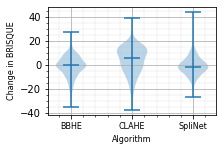

In [167]:
algos = ["bbhe", "clahe", "splinet"]
plt.figure(figsize=(3.2, 2.2))
plt.violinplot(diff[algos], showmedians=True)
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
#plt.axhline(color="black", linewidth=1, zorder=1.6)
plt.xticks(ticks=range(1, 4), labels=["BBHE", "CLAHE", "SpliNet"], fontsize=8)
plt.xlabel("Algorithm", fontsize=8)
plt.ylabel("Change in BRISQUE", fontsize=8)
plt.tight_layout()
plt.savefig("diff_violin.pdf")

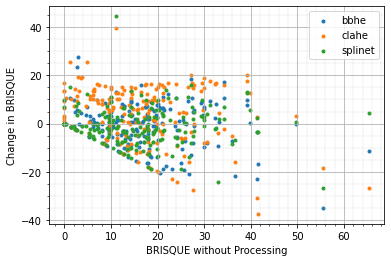

In [169]:
for algo in algos:
    plt.scatter(diff.no_processing, diff[algo], marker=".", label=algo)
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
plt.xlabel("BRISQUE without Processing")
plt.ylabel("Change in BRISQUE")
plt.legend()

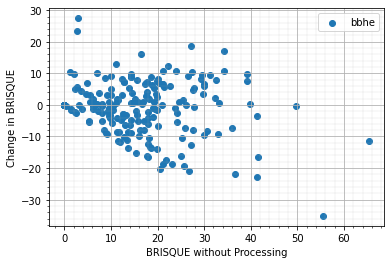

In [158]:
for algo in ["bbhe"]:
    plt.scatter(diff.no_processing, diff[algo], label=algo)
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
plt.xlabel("BRISQUE without Processing")
plt.ylabel("Change in BRISQUE")
plt.legend()

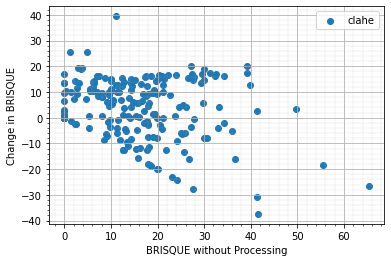

In [159]:
for algo in ["clahe"]:
    plt.scatter(diff.no_processing, diff[algo], label=algo)
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
plt.xlabel("BRISQUE without Processing")
plt.ylabel("Change in BRISQUE")
plt.legend()

PCC:  [[ 1.         -0.04475986]
 [-0.04475986  1.        ]]


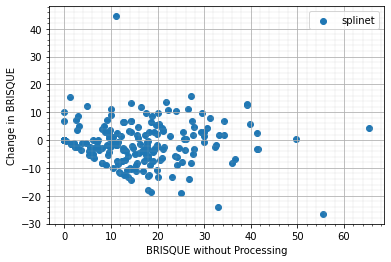

In [164]:
for algo in ["splinet"]:
    plt.scatter(diff.no_processing.values, diff[algo], label=algo)
    print("PCC: ", np.corrcoef(diff.no_processing.values, diff[algo].values))
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
plt.xlabel("BRISQUE without Processing")
plt.ylabel("Change in BRISQUE")
plt.legend()

In [165]:
diff["splinet"].values

array([-4.64261085e+00, -8.82605934e+00,  1.85390472e+00, -1.32628775e+01,
        6.73155117e+00,  2.78499985e+00, -1.11616626e+01, -5.24102783e+00,
        4.91453648e+00, -7.23553467e+00, -7.48917675e+00,  1.29599857e+00,
        6.58800125e-01, -8.62315178e-01, -2.30082130e+00,  2.12649345e+00,
       -2.52467346e+00, -1.06922147e+01,  9.06065655e+00,  1.06855392e+01,
       -6.41997719e+00,  3.98710251e+00, -3.40743637e+00,  7.88905716e+00,
        1.79534340e+00, -2.79751587e+00,  3.24069595e+00,  2.85346413e+00,
       -1.27420793e+01,  0.00000000e+00, -3.13235092e+00, -2.29487801e+00,
       -5.57505035e+00,  1.12211924e+01, -1.47947931e+00,  8.68194580e-01,
       -3.92455864e+00,  9.75724792e+00,  2.80029869e+00, -1.24886300e+01,
       -1.32271261e+01,  1.12274513e+01, -1.38637562e+01, -8.07093239e+00,
        0.00000000e+00, -4.36035061e+00,  7.11992216e+00, -9.97150284e+00,
        1.52972412e+00, -2.34097481e+00,  2.56887436e-01, -2.22488689e+00,
        4.27152252e+00,  

In [162]:
diff.no_processing.values

array([ 5.5330596 ,  8.82605934, 17.30340767, 23.14693069, 14.28803158,
        8.77928448, 16.86074448,  5.24102783,  8.49651527, 12.91219425,
       12.43495846, 10.46321392,  9.91739273,  4.55589485, 19.78403854,
       19.97964859, 21.37472725, 13.37433243,  9.90290737, 22.31869125,
        6.41997719,  8.01631641, 12.52820587, 31.22040176, 27.61091042,
       24.54765129, 21.1883297 , 29.94454002, 17.89613533,  0.        ,
       18.01314545,  9.97697449, 13.62882519, 10.02481937,  1.47947931,
       15.77318382, 16.6953125 , 29.54921722, 25.53157043, 12.70861053,
       20.07380676, 26.61347961, 26.64748383,  8.07093239,  0.        ,
        9.50795269,  2.58240366, 10.37213898, 29.85995102, 32.33657074,
       25.74795532, 14.49199009, 65.3431015 ,  0.        , 18.97118759,
        6.1381464 ,  0.29673269, 20.96677017, 11.84946251, 12.35824394,
       18.65414429, 19.94008636, 12.23077488, 12.81165314, 12.8543787 ,
        9.26542187, 11.53063297, 32.90005875,  0.        , 20.87

# Ratios

# Ratios

In [146]:
ratios = pd.DataFrame(columns=["original_filename", "bbhe", "clahe", "splinet", "no_processing"])
# the algorithm columns are deltas compared to no_processing
for i, fn in enumerate(fns):
    rows = df.query('original_filename==@fn')
    np_score = rows[rows.algorithm == "no_processing"].score.iloc[0]
    result = {
        "original_filename": fn,
        "bbhe": rows.query('algorithm=="bbhe"').score.iloc[0] / np_score,
        "clahe": rows.query('algorithm=="clahe"').score.iloc[0] / np_score,
        "splinet": rows.query('algorithm=="splinet"').score.iloc[0] / np_score,
        "no_processing": np_score,
    }
    ratios = ratios.append(result, ignore_index=True)
ratios

/tmp/ipykernel_20603/2112843700.py:8: RuntimeWarning: invalid value encountered in double_scalars
  "bbhe": rows.query('algorithm=="bbhe"').score.iloc[0] / np_score,
/tmp/ipykernel_20603/2112843700.py:9: RuntimeWarning: invalid value encountered in double_scalars
  "clahe": rows.query('algorithm=="clahe"').score.iloc[0] / np_score,
/tmp/ipykernel_20603/2112843700.py:10: RuntimeWarning: invalid value encountered in double_scalars
  "splinet": rows.query('algorithm=="splinet"').score.iloc[0] / np_score,
/tmp/ipykernel_20603/2112843700.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  "clahe": rows.query('algorithm=="clahe"').score.iloc[0] / np_score,
/tmp/ipykernel_20603/2112843700.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  "splinet": rows.query('algorithm=="splinet"').score.iloc[0] / np_score,


,original_filename,bbhe,clahe,splinet,no_processing
0,MuzYhuKsV6.png,1.177665,2.854321,0.160932,5.533060
1,7OKvzizH.png,0.000000,0.287238,0.000000,8.826059
2,eD80tfb0.png,1.389202,1.922935,1.107141,17.303408
3,1UXZfhm4.png,0.188575,0.000000,0.427014,23.146931
4,VaD7nRZa.png,1.620346,1.934458,1.471132,14.288032
...,...,...,...,...,...
194,pqpowjWytV.png,0.626415,1.898603,1.194514,9.648346
195,1432.png,NaN,inf,inf,0.000000
196,j1xXEzjl.png,0.696997,6.145118,0.718141,3.754857
197,tOdxgRa3.png,0.301527,0.000000,0.465244,19.835863


In [147]:
filtered_ratios = ratios[~ratios.isin([np.nan, np.inf, -np.inf]).any(1)]
filtered_ratios

,original_filename,bbhe,clahe,splinet,no_processing
0,MuzYhuKsV6.png,1.177665,2.854321,0.160932,5.533060
1,7OKvzizH.png,0.000000,0.287238,0.000000,8.826059
2,eD80tfb0.png,1.389202,1.922935,1.107141,17.303408
3,1UXZfhm4.png,0.188575,0.000000,0.427014,23.146931
4,VaD7nRZa.png,1.620346,1.934458,1.471132,14.288032
...,...,...,...,...,...
192,0AKZCRZA.png,0.347084,0.769213,0.240916,25.002766
194,pqpowjWytV.png,0.626415,1.898603,1.194514,9.648346
196,j1xXEzjl.png,0.696997,6.145118,0.718141,3.754857
197,tOdxgRa3.png,0.301527,0.000000,0.465244,19.835863


(-0.2, 6.0)

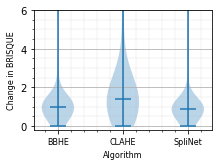

In [145]:
algos = ["bbhe", "clahe", "splinet"]
plt.figure(figsize=(3.2, 2.2))
plt.violinplot(filtered_ratios[algos], showmedians=True)
plt.minorticks_on()
plt.grid(which="major", zorder=0)
plt.grid(which="minor", linestyle=":", linewidth=.4, zorder=0)
#plt.axhline(color="black", linewidth=1, zorder=1.6)
plt.xticks(ticks=range(1, 4), labels=["BBHE", "CLAHE", "SpliNet"], fontsize=8)
plt.xlabel("Algorithm", fontsize=8)
plt.ylabel("Change in BRISQUE", fontsize=8)
plt.savefig("ratios_violin.pdf")
plt.ylim(-.2, 6)